# Regression Models

**Introduction to Python for Data Science** \
Course with Hacktiv8

***

**Sesi 11**

Kamis, 17 Juni 2021 • 19:00 - 22:00 WIB

- Linear Regression

***

## Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Simple Linear Regression

_Import library_:

In [2]:
from sklearn.linear_model import LinearRegression

Menentukan data:

In [3]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

print(x, '\tShape:', x.shape, '\tDimension:', x.ndim)
print(y, '\tShape:', y.shape, '\tDimension:', y.ndim)

[ 5 15 25 35 45 55] 	Shape: (6,) 	Dimension: 1
[ 5 20 14 32 22 38] 	Shape: (6,) 	Dimension: 1


Input x harus dua dimensi:

In [4]:
x = x.reshape((-1, 1))

print(x, '\tShape:', x.shape, '\tDimension:', x.ndim)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]] 	Shape: (6, 1) 	Dimension: 2


Membuat model _linear regression_ dan melakukan _fitting_ data:

In [5]:
model = LinearRegression()
model

LinearRegression()

In [6]:
model.fit(x, y)

LinearRegression()

Mendapatkan _coefficient of determination_:

In [7]:
r_sq = model.score(x, y)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.715875613747954


Mendapatkan respons yang diprediksi:

In [8]:
y_pred = model.predict(x)
print('Prediction:', y_pred)
print('True target:', y)
print('Base model:', [y.mean().tolist()] * x.shape[0])

Prediction: [ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]
True target: [ 5 20 14 32 22 38]
Base model: [21.833333333333332, 21.833333333333332, 21.833333333333332, 21.833333333333332, 21.833333333333332, 21.833333333333332]


Mendapatkan nilai _intercept_ dan _slope_ untuk menentukan garis regresi:

In [9]:
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

Intercept: 5.633333333333329
Slope: [0.54]


Plot datanya:

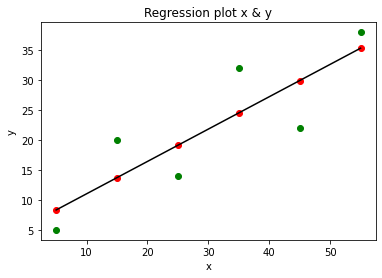

In [10]:
plt.scatter(x, y, c='green')
plt.plot(x, y_pred, c='black')
plt.scatter(x, y_pred, c='red')

plt.title('Regression plot x & y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Multiple Linear Regression

_Multiple_ atau _multivariate linear regression_ adalah kasus regresi linier dengan dua atau lebih variabel independen.

_Import packages_ (sudah di atas) lalu _provide_ data:

In [11]:
xm = np.array([[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]])
ym = np.array([4, 5, 20, 14, 32, 22, 38, 43])

print(xm, '\nShape:', xm.shape, '\tDimension:', xm.ndim, end='\n\n')
print(ym, '\nShape:', ym.shape, '\tDimension:', ym.ndim)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]] 
Shape: (8, 2) 	Dimension: 2

[ 4  5 20 14 32 22 38 43] 
Shape: (8,) 	Dimension: 1


Membuat model, _fit_, lalu mendapatkan nilai-nilai dari properti model:

In [12]:
mr_model = LinearRegression().fit(xm, ym)

mr_rsq = mr_model.score(xm, ym)
mr_bias = mr_model.intercept_
mr_coef = mr_model.coef_

print('coefficient of determination:', mr_rsq)
print('intercept:', mr_bias)
print('slope:', mr_coef)

coefficient of determination: 0.8615939258756775
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


Memprediksi respons:

In [13]:
ym_pred = mr_model.predict(xm)
print('predicted response:', ym_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


Menerapkan model ke data baru:

In [14]:
x_new = np.arange(10).reshape((-1, 2))
print(x_new)
y_new = mr_model.predict(x_new)
print(y_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


### Polynomial Regression

_Import packages_ (sudah di atas) ditambah _import class_ baru:

In [15]:
from sklearn.preprocessing import PolynomialFeatures

_Provide_ data:

In [16]:
xp = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
yp = np.array([15, 11, 2, 8, 25, 32])

print(xp, '\nShape:', xp.shape, '\tDimension:', xp.ndim, end='\n\n')
print(yp, '\nShape:', yp.shape, '\tDimension:', yp.ndim)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]] 
Shape: (6, 1) 	Dimension: 2

[15 11  2  8 25 32] 
Shape: (6,) 	Dimension: 1


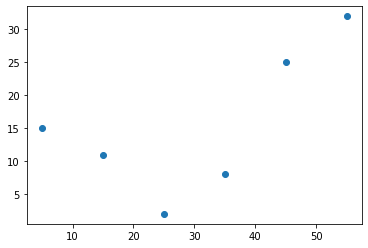

In [17]:
plt.scatter(xp, yp)
plt.show()

Membuat _instance polynomial_:

In [18]:
poly = PolynomialFeatures(include_bias=False)
poly

PolynomialFeatures(include_bias=False)

Menyesuaikan data masukan dengan _fit_:

In [19]:
poly.fit(xp)

PolynomialFeatures(include_bias=False)

Transformasi data masukan:

In [20]:
xp_poly = poly.transform(xp)
print(xp_poly)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


Membuat model, _fit_, dan prediksi:

In [21]:
poly_model = LinearRegression().fit(xp_poly, yp)

poly_rsq = poly_model.score(xp_poly, yp)
poly_bias = poly_model.intercept_
poly_coef = poly_model.coef_
yp_pred = poly_model.predict(xp_poly)

print('coefficient of determination:', poly_rsq)
print('intercept:', poly_bias)
print('coefficients:', poly_coef)
print('predicted response:', yp_pred)

coefficient of determination: 0.8908516262498564
intercept: 21.372321428571425
coefficients: [-1.32357143  0.02839286]
predicted response: [15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


Plot data:

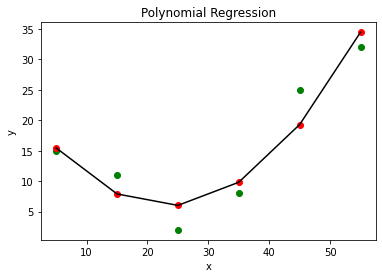

In [22]:
plt.scatter(xp, yp, c='green')
plt.plot(xp, yp_pred, c='black')
plt.scatter(xp, yp_pred, c='red')

plt.title('Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Menggunakan `degree=4`:

[[5.000000e+00 2.500000e+01 1.250000e+02 6.250000e+02]
 [1.500000e+01 2.250000e+02 3.375000e+03 5.062500e+04]
 [2.500000e+01 6.250000e+02 1.562500e+04 3.906250e+05]
 [3.500000e+01 1.225000e+03 4.287500e+04 1.500625e+06]
 [4.500000e+01 2.025000e+03 9.112500e+04 4.100625e+06]
 [5.500000e+01 3.025000e+03 1.663750e+05 9.150625e+06]]
Coefficient of determination: 0.9996871368552785
Coefficient/Parameters/Weights: [ 3.67175926e+00 -3.44062500e-01  9.90740741e-03 -8.54166667e-05]
Slope/Bias: 4.085503472844266
True Target: [15 11  2  8 25 32]
Predictions: [15.02777778 10.86111111  2.27777778  7.72222222 25.13888889 31.97222222]


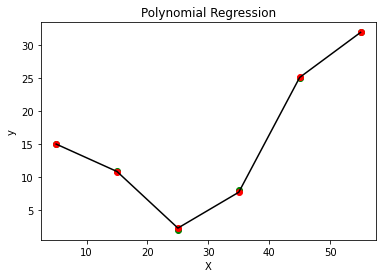

In [23]:
# generate polynomial features
poly = PolynomialFeatures(degree=4, include_bias=False)
poly_X = poly.fit_transform(xp)
print(poly_X)

# fit polynomial features to linear regressions
poly_model = LinearRegression()
poly_model.fit(poly_X, yp)

# evaluate metrics
poly_r2 = poly_model.score(poly_X, yp)
poly_coef = poly_model.coef_
poly_bias = poly_model.intercept_
print("Coefficient of determination:", poly_r2)
print("Coefficient/Parameters/Weights:", poly_coef)
print("Slope/Bias:", poly_bias)

# predict
y_pred = poly_model.predict(poly_X)
print("True Target:", yp)
print("Predictions:", y_pred)

# visualize results
plt.scatter(xp, yp, c="green")
plt.plot(xp, y_pred, c="black")
plt.scatter(xp, y_pred, c="red")

plt.title("Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Kita dapat menerapkan prosedur yang sama jika kita memiliki beberapa variabel masukan. Kita akan membuat _array_ masukan dengan lebih dari satu kolom, tetapi yang lainnya sama.

In [24]:
xmv = np.array([[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]])
ymv = np.array([4, 5, 20, 14, 32, 22, 38, 43])

Transformasi data masukan:

In [25]:
xmv_trans = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xmv)

Membuat model, kemudian _fit_:

In [26]:
model_mv = LinearRegression().fit(xmv_trans, ymv)

Dapatkan hasil dan prediksi:

In [27]:
r_sq_mv = model_mv.score(xmv_trans, ymv)
intercept_mv, coefficients_mv = model_mv.intercept_, model_mv.coef_

ymv_pred = model_mv.predict(xmv_trans)

print('coefficient of determination:', r_sq_mv)
print('intercept:', intercept_mv)
print('coefficients:', coefficients_mv)
print('predicted response:', ymv_pred)

coefficient of determination: 0.9453701449127822
intercept: 0.8430556452395734
coefficients: [ 2.44828275  0.16160353 -0.15259677  0.47928683 -0.4641851 ]
predicted response: [ 0.54047408 11.36340283 16.07809622 15.79139    29.73858619 23.50834636
 39.05631386 41.92339046]


### Advanced Linear Regression with `statsmodels`

_Import packages_:

In [28]:
import statsmodels.api as sm

Memberikan data masukan dan keluaran:

In [29]:
x = np.array([[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]])
y = np.array([4, 5, 20, 14, 32, 22, 38, 43])
print(x)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]


Menambahkan kolom satu ke input jika kita ingin `statsmodels` menghitung _intercept_ dengan `add_constant()` yang mengambil _array_ input x sebagai argumen dan mengembalikan _array_ baru dengan kolom yang disisipkan di awal. 

In [30]:
x = sm.add_constant(x)
print(x)
print(y)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[ 4  5 20 14 32 22 38 43]


_Regression model_ didasarkan pada _ordinary least squares_. **Argumen pertama adalah output, diikuti dengan input**:

In [31]:
model = sm.OLS(y, x)

_Fit model_:

In [32]:
results = model.fit()

Mendapatkan hasil:

In [33]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Mon, 20 Dec 2021   Prob (F-statistic):            0.00713
Time:                        23:25:42   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

C:\ProgramData\Miniconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Mengekstrak beberapa nilai dari tabel hasil dan mendapatkan _predicted response_ pada nilai input yang digunakan untuk membuat model:

In [34]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)
print('predicted response:', results.fittedvalues, sep='\n')
print('predicted response:', results.predict(x), sep='\n')

coefficient of determination: 0.8615939258756777
adjusted coefficient of determination: 0.8062314962259488
regression coefficients: [5.52257928 0.44706965 0.25502548]
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


Jika kita menginginkan prediksi dengan regressor baru, kita juga bisa menerapkan `.predict()` dengan data baru sebagai argumen:

In [35]:
x_new = sm.add_constant(np.arange(10).reshape((-1, 2)))
print(x_new)
y_new = results.predict(x_new)
print(y_new)

[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


---

## Implementasi Regresi Linier

### Menggunakan `statmodels`

In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import datasets

In [37]:
data = datasets.load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

In [38]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
target = pd.DataFrame(data.target, columns=["MEDV"])
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [40]:
X = df["RM"]
y = target["MEDV"]

model = sm.OLS(y, X).fit()
pred = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Mon, 20 Dec 2021   Prob (F-statistic):                   3.74e-256
Time:                        23:25:42   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

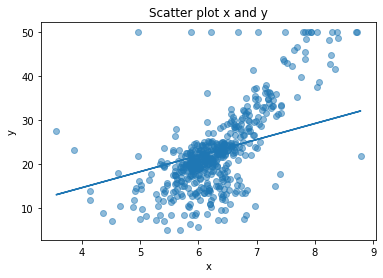

In [41]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, pred)
plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [42]:
df["targets"] = y
df["predictions"] = pred
df.sample(n=20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,targets,predictions
81,0.04462,25.0,4.86,0.0,0.426,6.619,70.4,5.4007,4.0,281.0,19.0,395.63,7.22,23.9,24.181526
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6,21.857995
152,1.12658,0.0,19.58,1.0,0.871,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12,15.3,18.310592
470,4.34879,0.0,18.10,0.0,0.580,6.167,84.0,3.0334,24.0,666.0,20.2,396.90,16.29,19.9,22.530212
79,0.08387,0.0,12.83,0.0,0.437,5.874,36.6,4.5026,5.0,398.0,18.7,396.06,9.10,20.3,21.459780
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86,22.5,21.974903
439,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24.0,666.0,20.2,396.90,22.88,12.8,20.557403
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,21.934716
337,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56,18.5,21.536501
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,22.709226


### Menggunakan SKLearn

In [43]:
from sklearn import linear_model
from sklearn import datasets

data = datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=['MEDV'])

X = df
y = target['MEDV']

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

In [44]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)

print('Score:', lm.score(X,y))

Score: 0.7406426641094095


In [45]:
df["targets"] = y
df["predictions"] = predictions
df.sample(n=20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,targets,predictions
336,0.03427,0.0,5.19,0.0,0.5150,5.869,46.3,5.2311,5.0,224.0,20.2,396.90,9.80,19.5,20.160972
255,0.03548,80.0,3.64,0.0,0.3920,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25,20.9,21.695809
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4,23.338880
396,5.87205,0.0,18.10,0.0,0.6930,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37,12.5,19.295591
492,0.11132,0.0,27.74,0.0,0.6090,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35,20.1,15.931185
431,10.06230,0.0,18.10,0.0,0.5840,6.833,94.3,2.0882,24.0,666.0,20.2,81.33,19.69,14.1,18.695544
200,0.01778,95.0,1.47,0.0,0.4030,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9,30.643939
138,0.24980,0.0,21.89,0.0,0.6240,5.857,98.2,1.6686,4.0,437.0,21.2,392.04,21.32,13.3,13.814839
420,11.08740,0.0,18.10,0.0,0.7180,6.411,100.0,1.8589,24.0,666.0,20.2,318.75,15.02,16.7,19.600027
198,0.03768,80.0,1.52,0.0,0.4040,7.274,38.3,7.3090,2.0,329.0,12.6,392.20,6.62,34.6,34.704691


Contoh lainnya:

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('dataset/CarPrice_Assignment.csv', usecols=['horsepower', 'price'])
df.head()

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


In [47]:
df.shape

(205, 2)

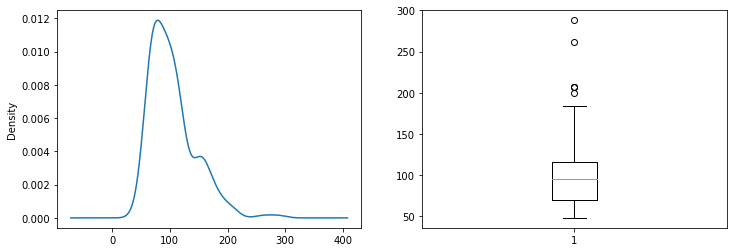

In [48]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

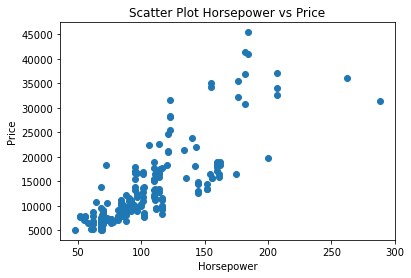

In [49]:
plt.scatter(df['horsepower'], df['price'])

plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

In [50]:
df.corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


In [51]:
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)

x_train: (164, 1)
x_test: (41, 1)


In [52]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

print('Coefficient:', lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)
print('Score:', lin_reg.score(x_test, y_test))

Coefficient: [[159.94762785]]
Intercept: [-3584.60792033]
Score: 0.5412845750969126


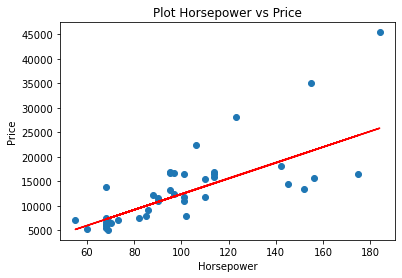

In [53]:
y_prediction = lin_reg.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediction, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')
plt.show()

Melakukan prediksi:

In [54]:
print(lin_reg.predict([[100]]))
print(lin_reg.predict([[150]]))
print(lin_reg.predict([[200]]))

[[12410.15486432]]
[[20407.53625664]]
[[28404.91764897]]


---